## EDA Explained

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
df_credit_card_balance = pd.read_csv('credit_card_balance.csv')
df_credit_card_balance.set_index('SK_ID_CURR')
df_credit_card_balance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

### We can see that most of the data here is numerical, we only have one column that is categorical
### Let's take a pick at the categorical data 

In [24]:
df_credit_card_balance['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Demand', 'Signed', 'Sent proposal',
       'Refused', 'Approved'], dtype=object)

## Loking at the distribution of the Name_Contract_Staus

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='Density'>

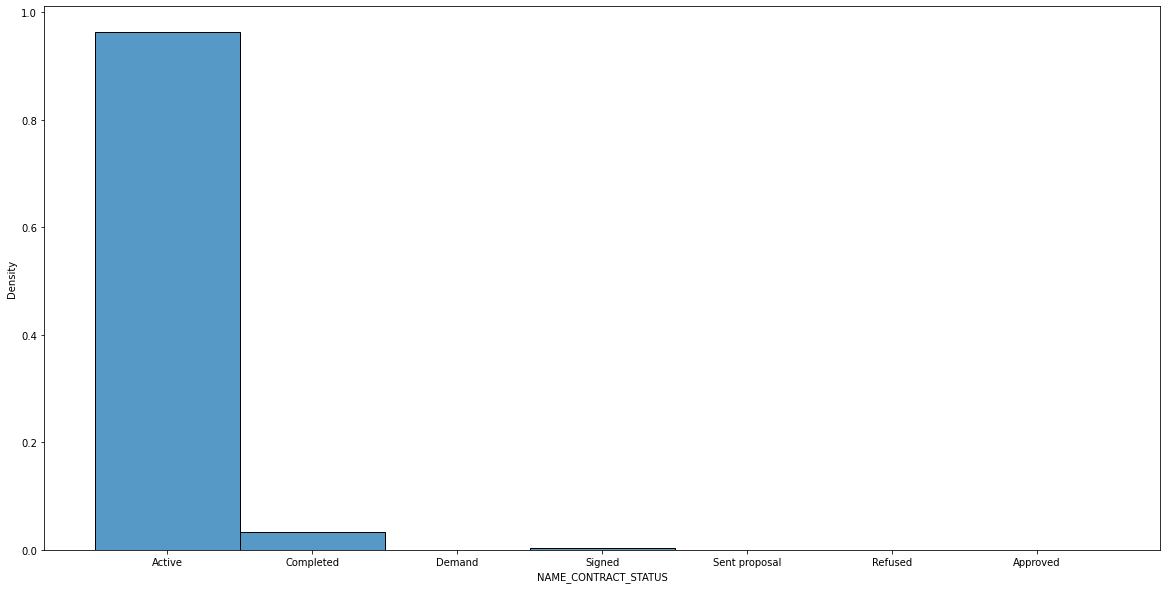

In [28]:
ffg,ax = plt.subplots(figsize=(20,10))
sns.histplot(ax=ax,stat='density',data=df_credit_card_balance['NAME_CONTRACT_STATUS'])

## We can see that the majority of the staus is active, we means that the credit card line is open, which makes sense these are indivduals who are currrenlty using their credit

In [29]:
df_credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

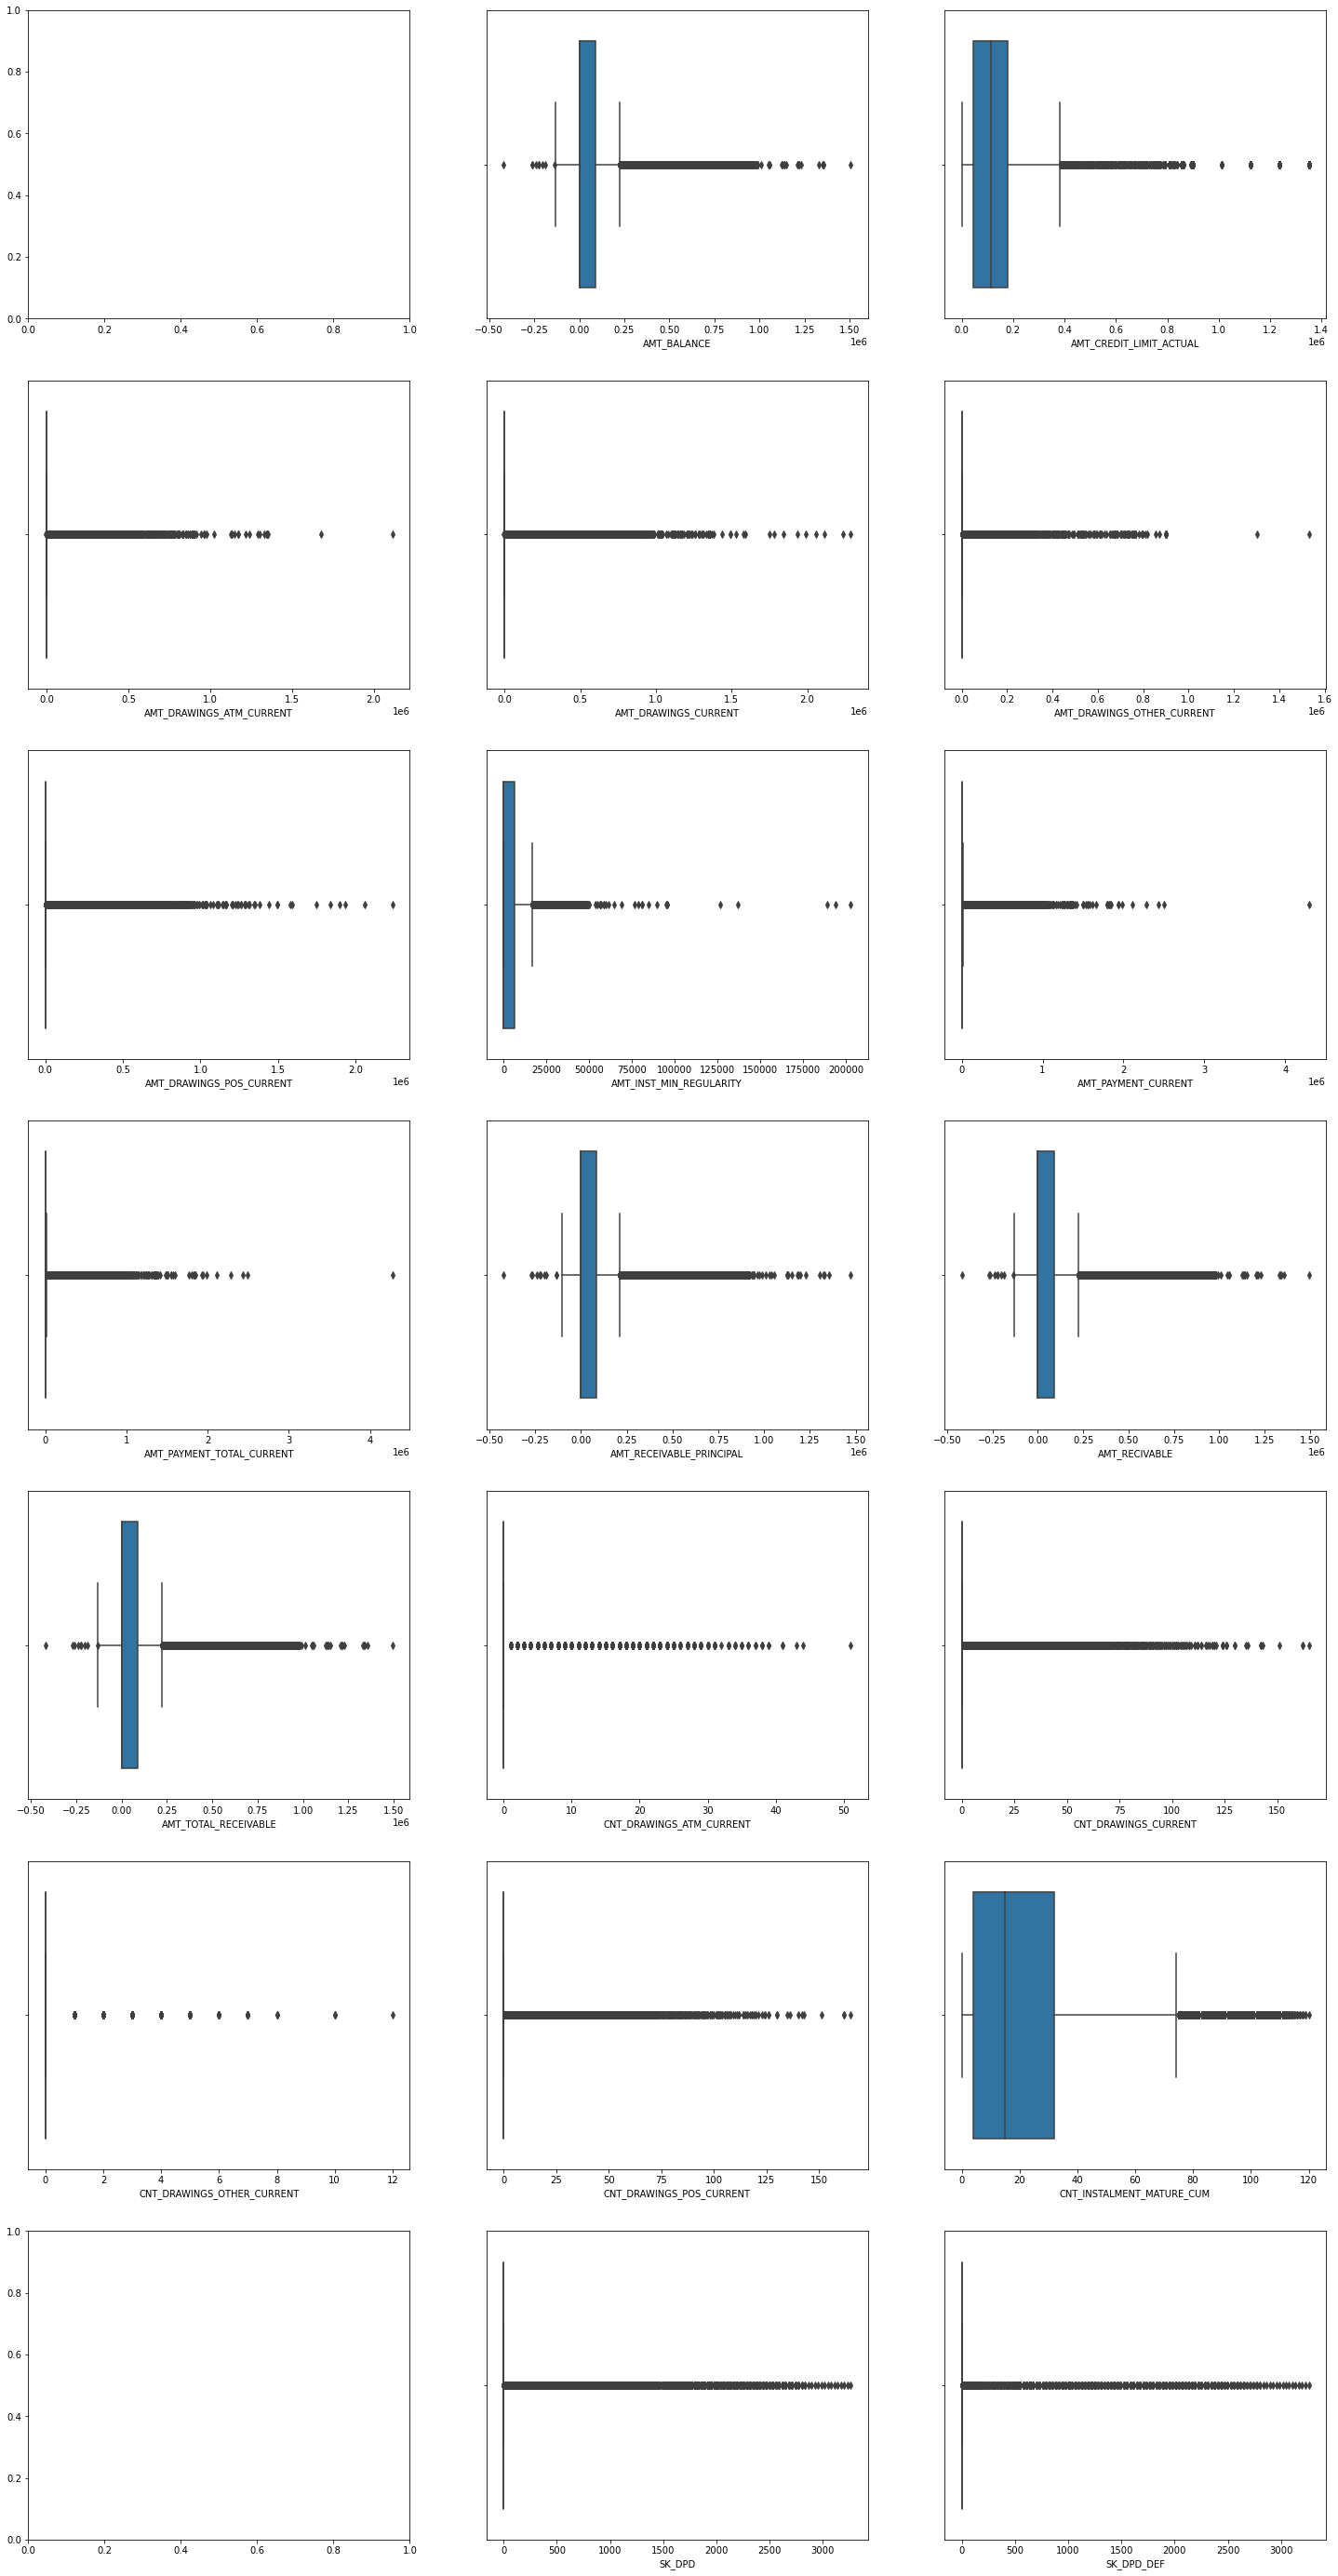

In [35]:
creditcardcols = df_credit_card_balance.columns.tolist()
plotting_card_cols = creditcardcols[2:]
row_number = len(plotting_card_cols)//3
graphs = np.reshape(plotting_card_cols,(row_number,3))
fig,axs = plt.subplots(nrows=row_number,ncols = 3,figsize=(25,50))

for row in range(row_number):
    for col in range(3):
        something = "{}".format(graphs[row][col])
        if something == 'MONTHS_BALANCE' or something == 'NAME_CONTRACT_STATUS':
            pass
        else:
            sns.boxplot(x=something,data=df_credit_card_balance,ax=axs[row][col])

## We can see that the majority of the remaining amount balance is less than $250,000

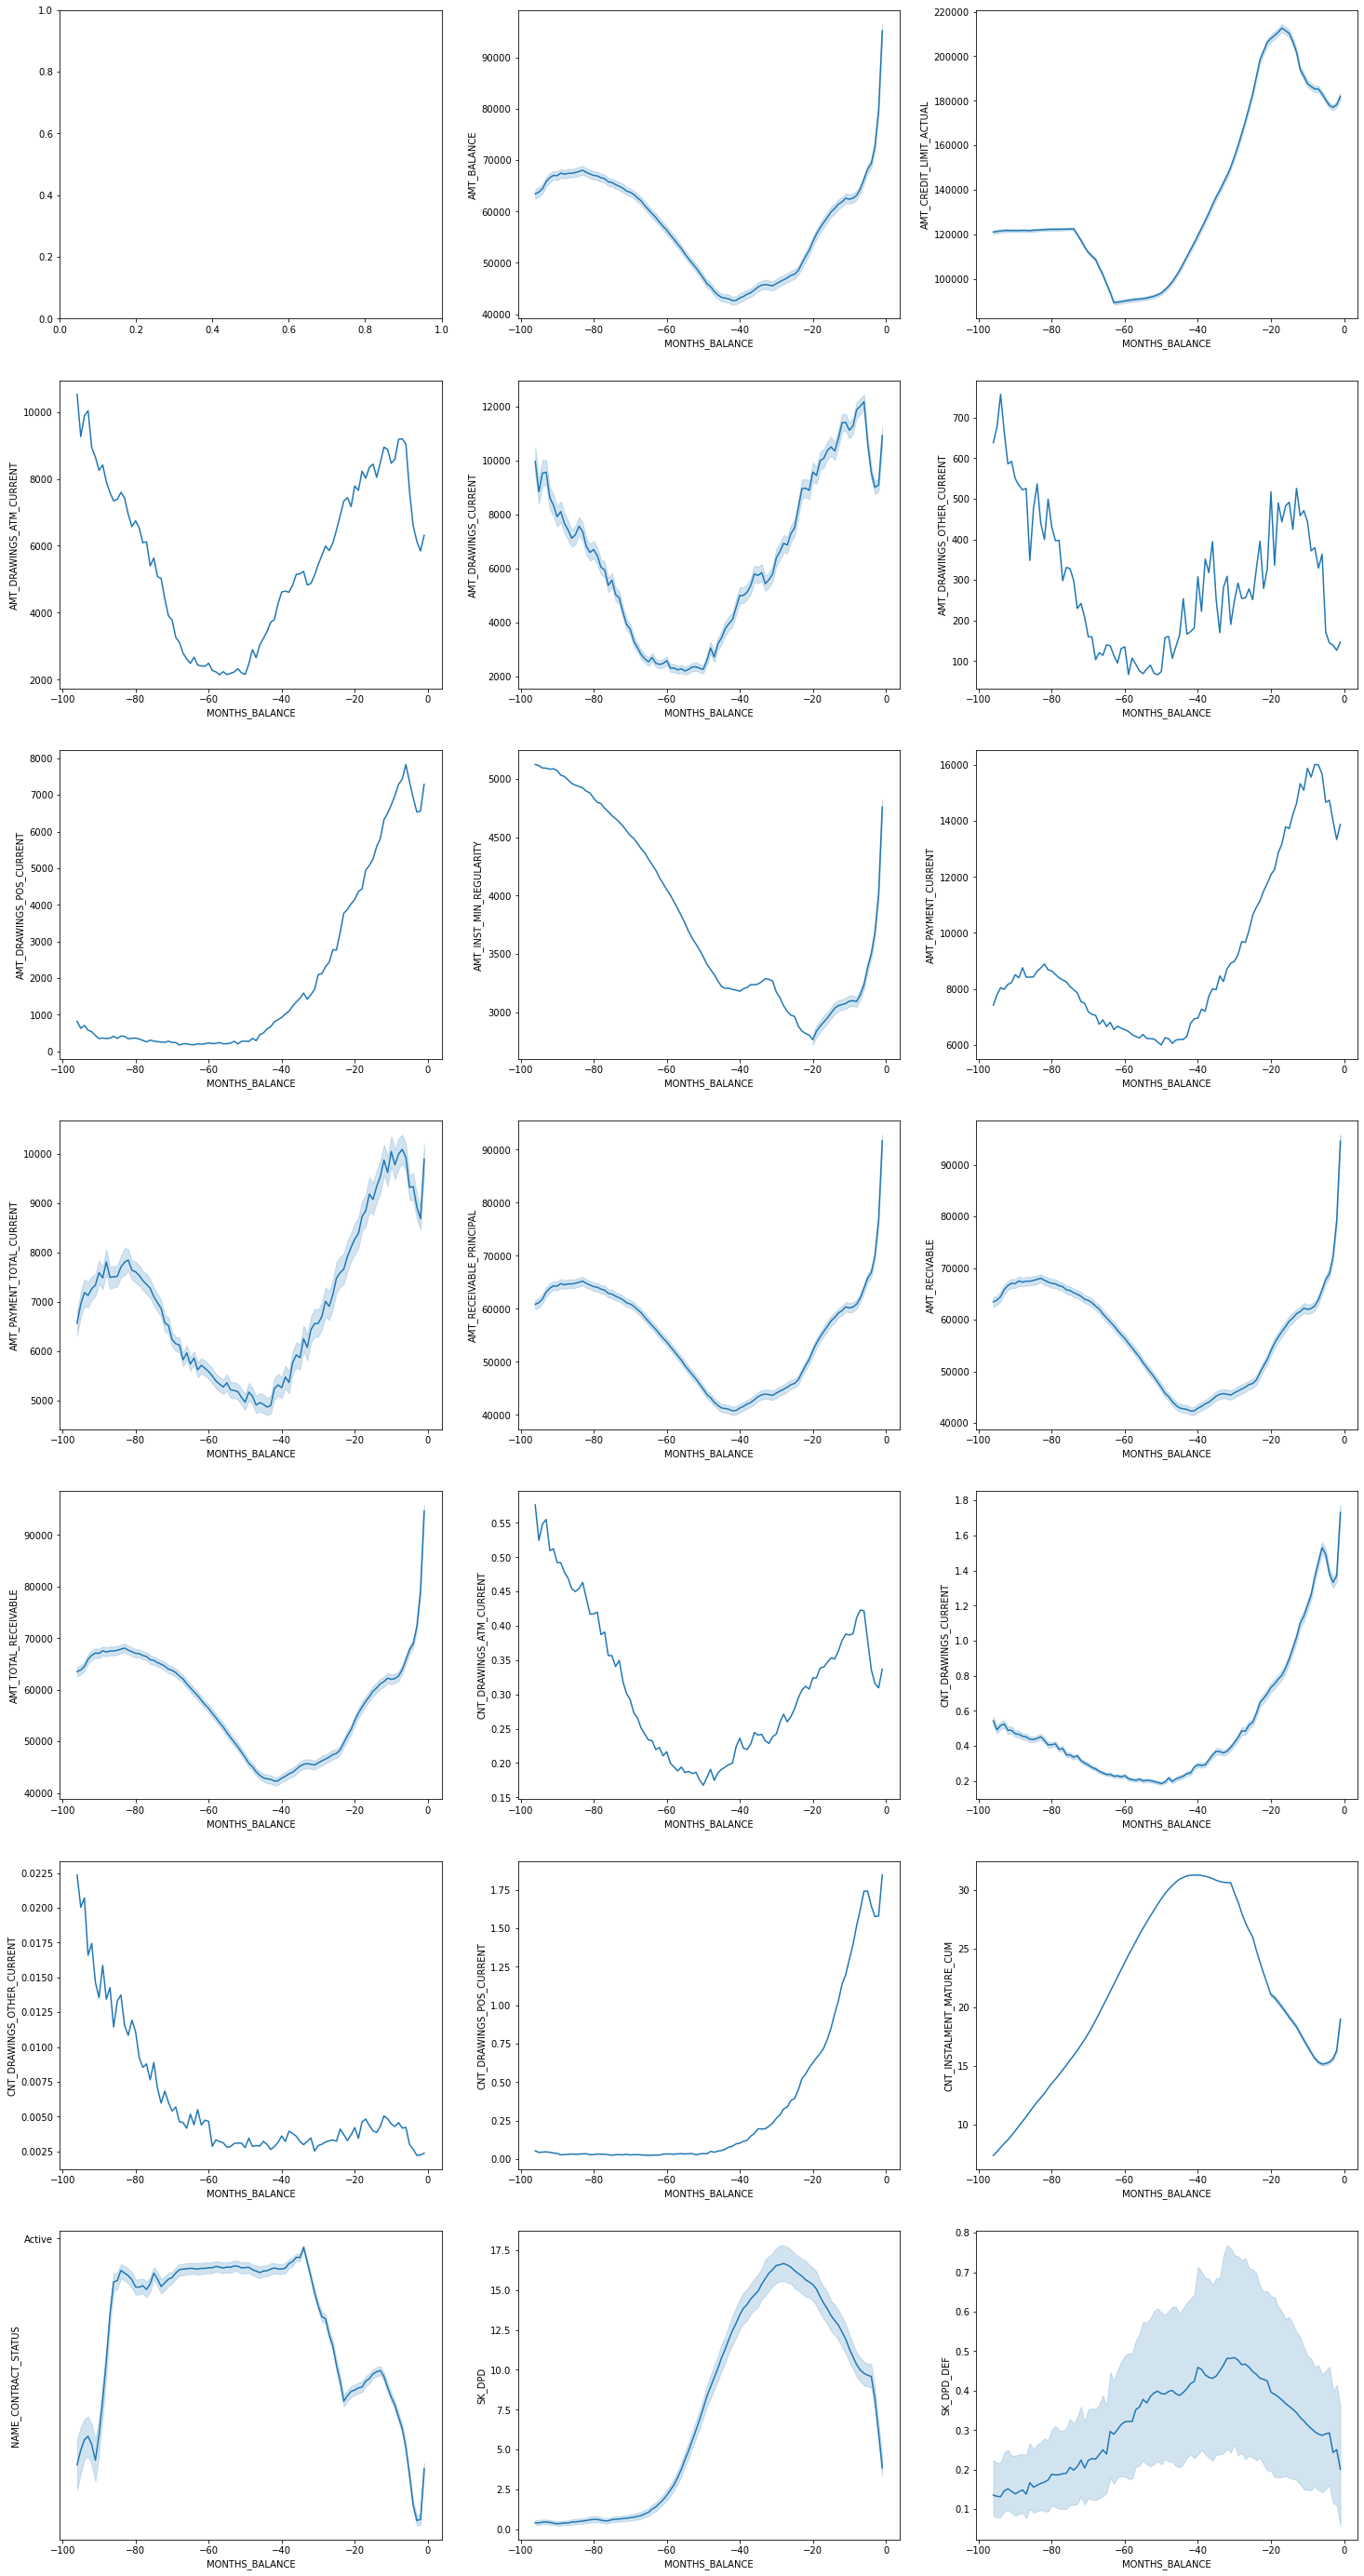

In [36]:
fig,axs = plt.subplots(nrows=row_number,ncols = 3,figsize=(25,50))

for row in range(row_number):
    for col in range(3):
        something = "{}".format(graphs[row][col])
        if something == 'MONTHS_BALANCE':
            pass
        else:
            sns.lineplot(x="MONTHS_BALANCE", y=something,data=df_credit_card_balance,ax=axs[row][col])

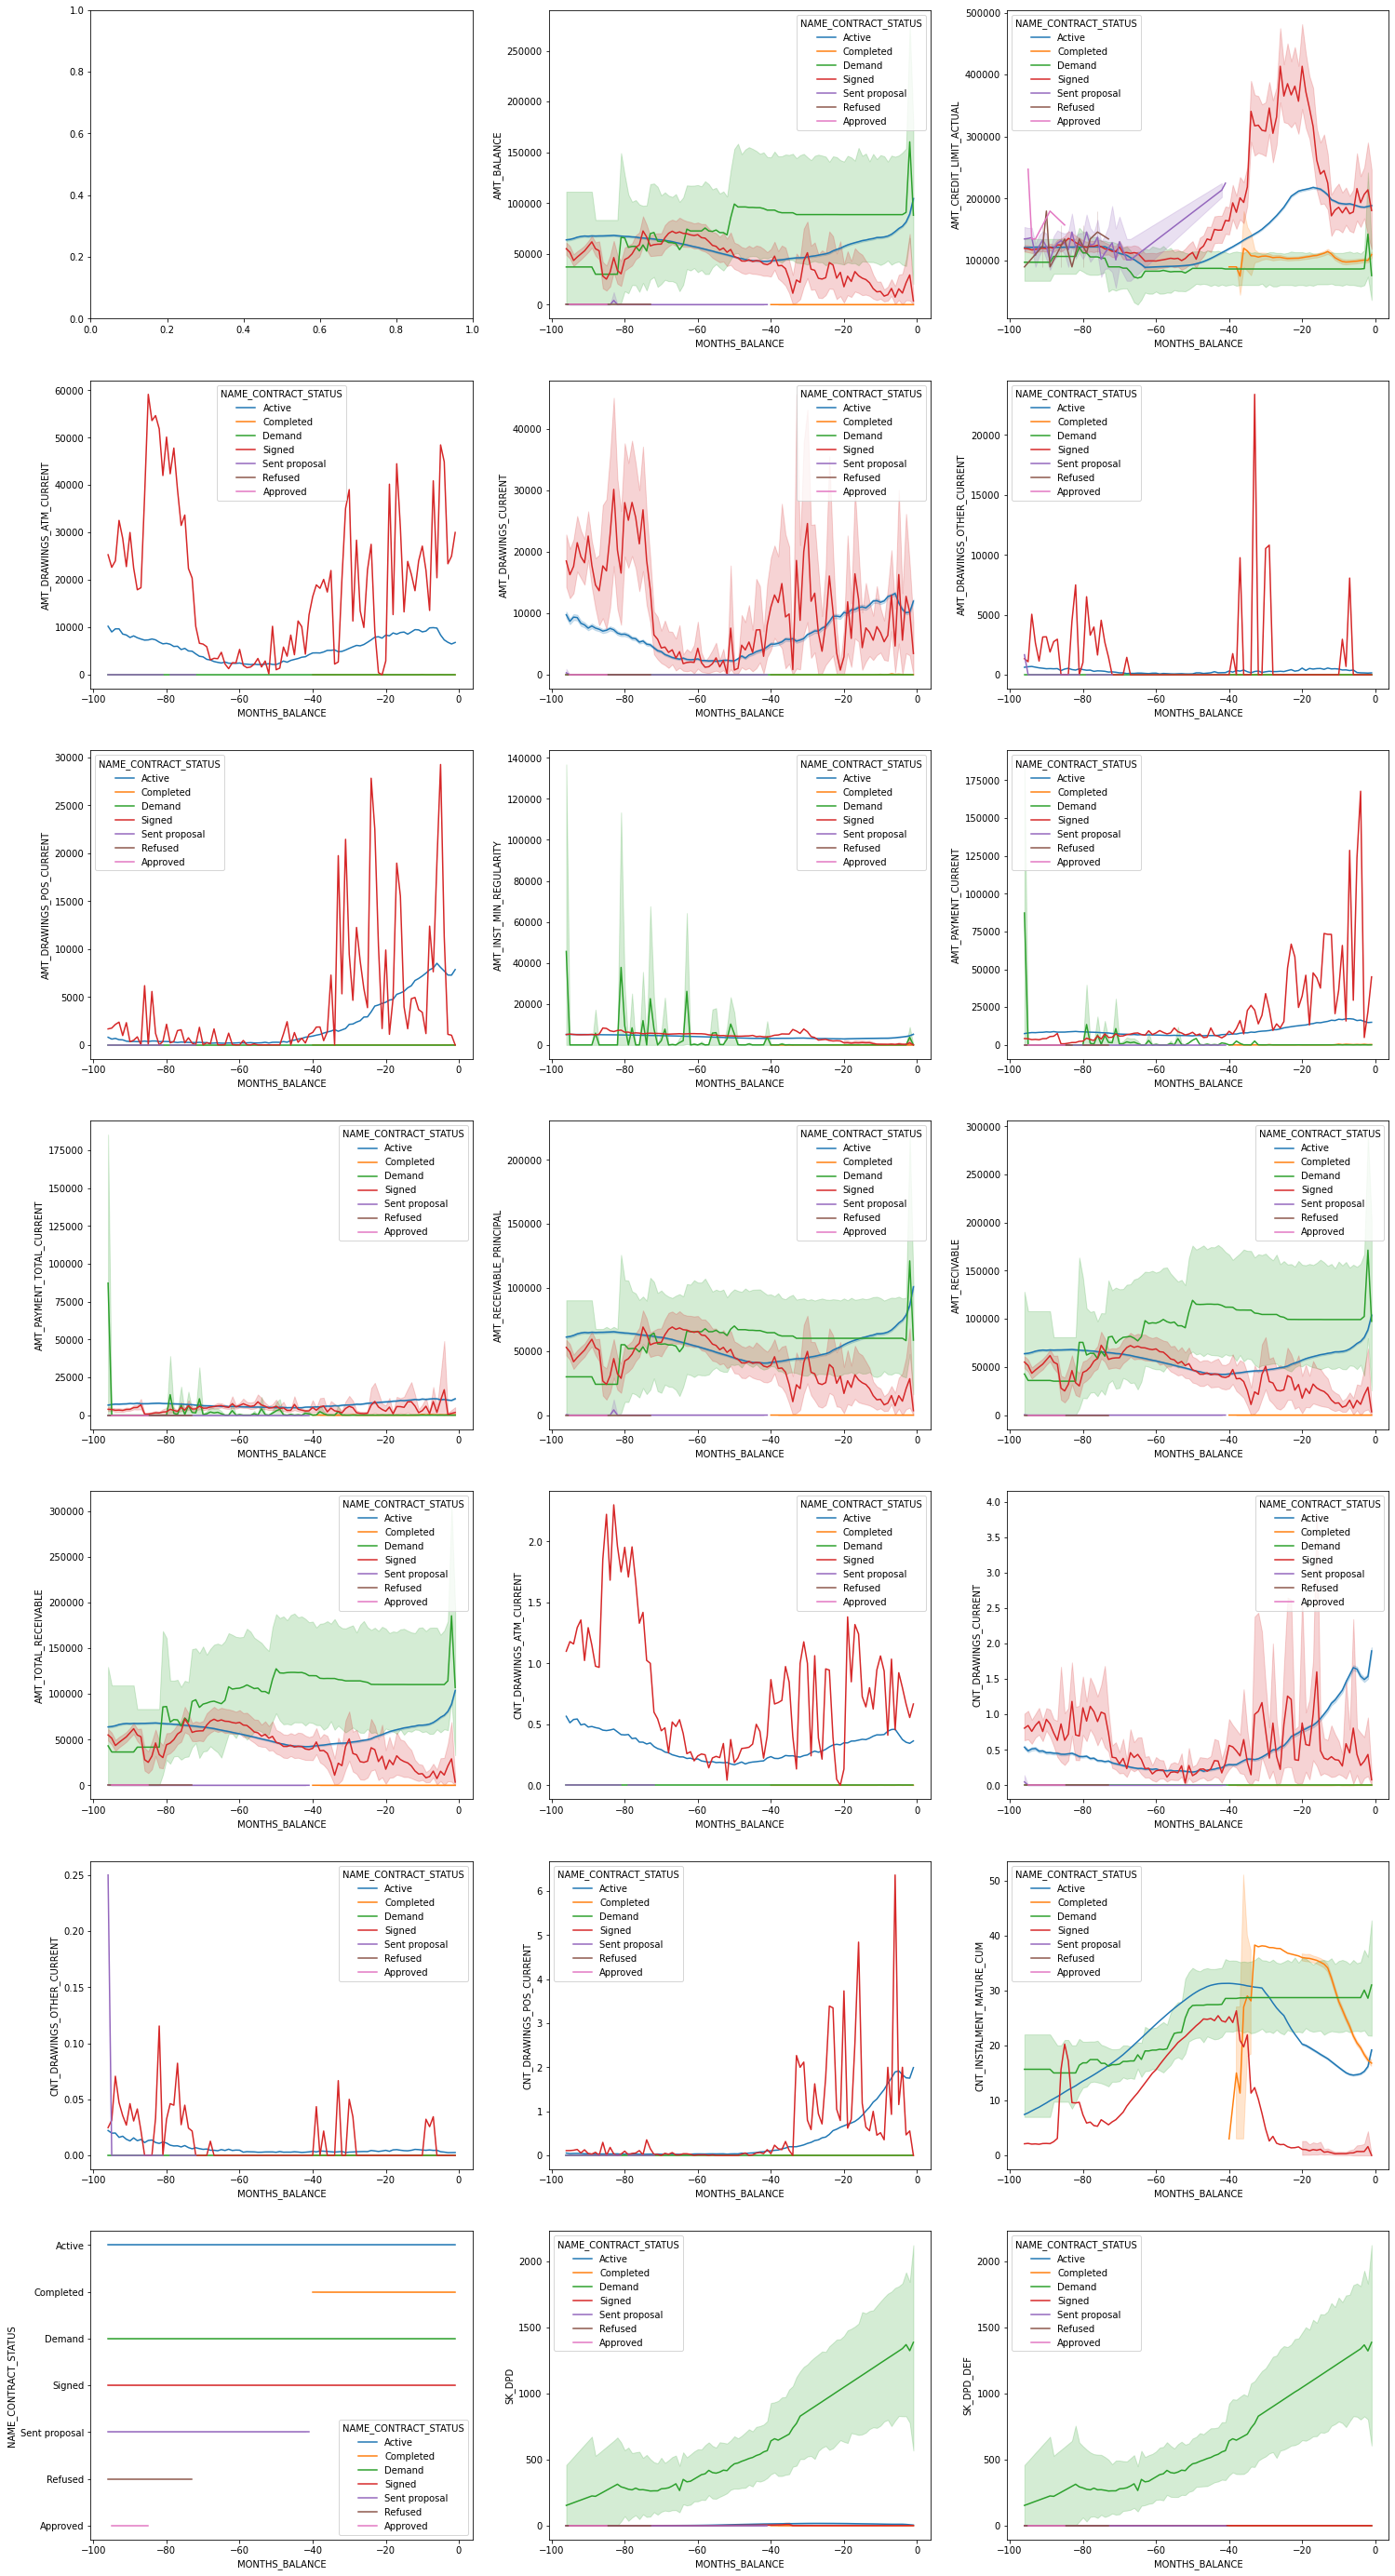

In [37]:
fig,axs = plt.subplots(nrows=row_number,ncols = 3,figsize=(25,50))

for row in range(row_number):
    for col in range(3):
        something = "{}".format(graphs[row][col])
        if something == 'MONTHS_BALANCE':
            pass
        else:
            sns.lineplot(x="MONTHS_BALANCE", y=something,data=df_credit_card_balance,hue='NAME_CONTRACT_STATUS',ax=axs[row][col])

<AxesSubplot:>

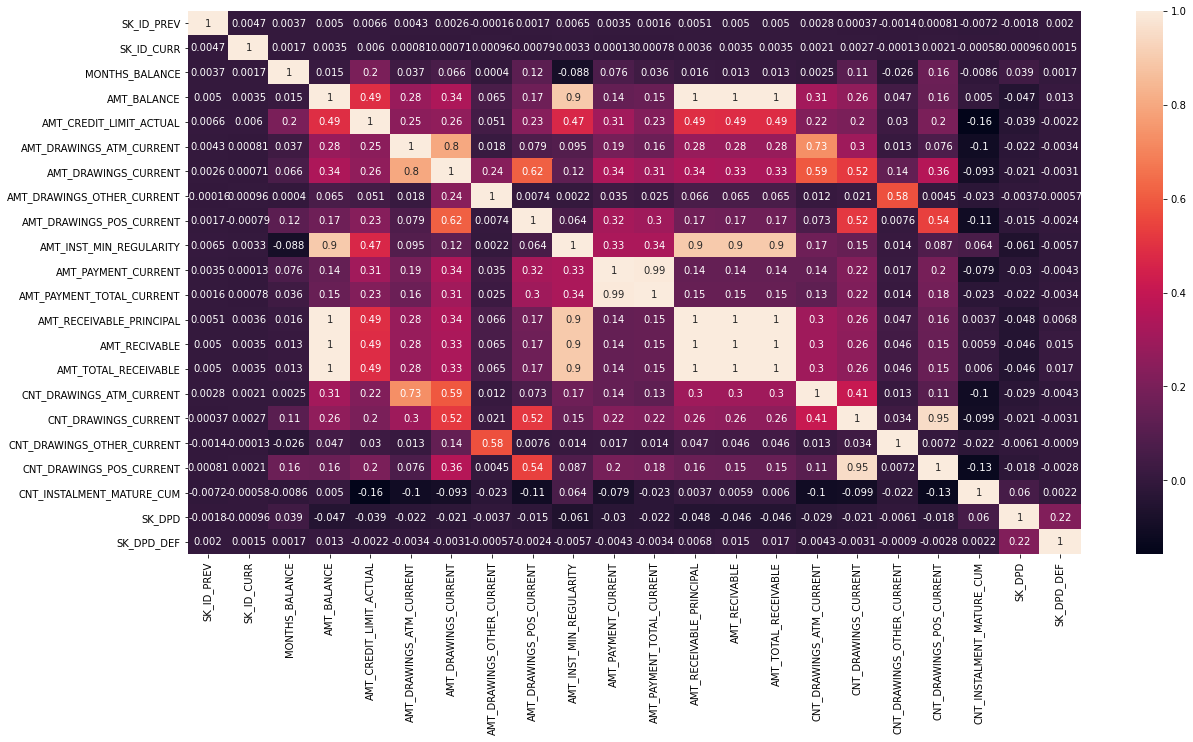

In [38]:
correlation_mat = df_credit_card_balance.corr()

sns.heatmap(correlation_mat, annot = True)